<a href="https://colab.research.google.com/github/EngineerMac/MEng-Project/blob/main/dataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv('/content/Room-AC_3D_Mesh.csv')
x = data['x']
y = data['y']
z = data['z']
vx = data['vx']
vy = data['vy']
vz = data['vz']

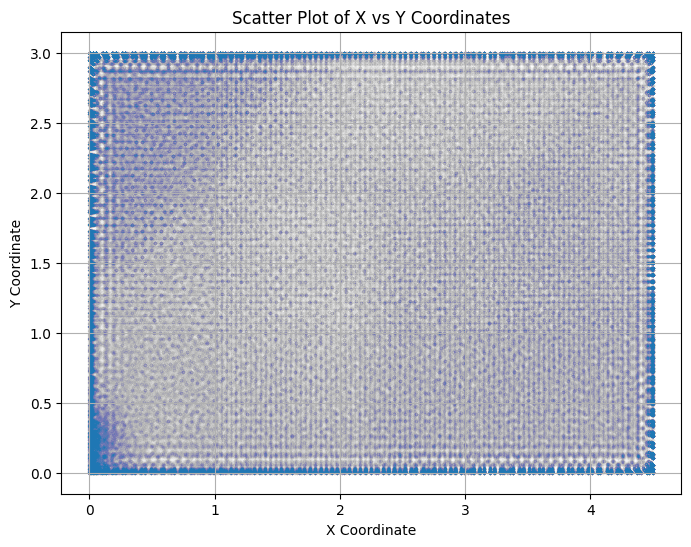

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=5, alpha=0.005)  # Adjust the marker size and transparency as needed
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of X vs Y Coordinates')
plt.grid(True)
plt.show()

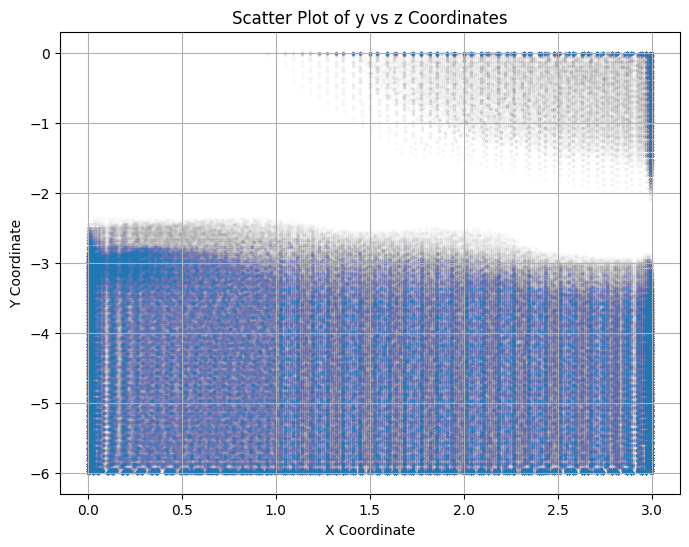

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y,z, s=5, alpha=0.005)  # Adjust the marker size and transparency as needed
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot of y vs z Coordinates')
plt.grid(True)
plt.show()

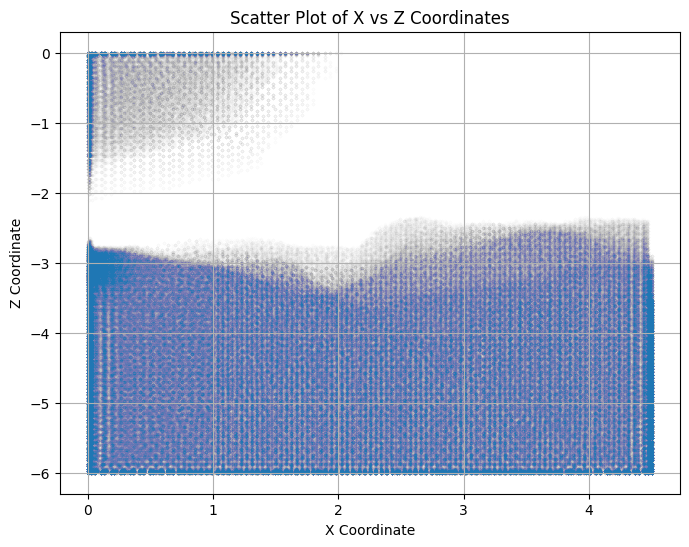

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(x,z, s=5, alpha=0.005)  # Adjust the marker size and transparency as needed
plt.xlabel('X Coordinate')
plt.ylabel('Z Coordinate')
plt.title('Scatter Plot of X vs Z Coordinates')
plt.grid(True)
plt.show()

In [ ]:
x_min = x.min()
y_min = y.min()
z_min = z.min()
x_max = x.max()
y_max = y.max()
z_max = z.max()


In [ ]:
cube_boundaries = [
    ((x_min, y_min, z_min), (x_max, y_max, z_max)),
    # Define boundaries for all 200 cubes
]

In [ ]:
cube_assignments = np.zeros(len(data), dtype=int)

In [ ]:
cube_cumulative_velocities = np.zeros((len(cube_boundaries), 3))
cube_counts = np.zeros(len(cube_boundaries), dtype=int)

In [ ]:
for i, (cube_min, cube_max) in enumerate(cube_boundaries):
    x_in_cube = (x >= cube_min[0]) & (x <= cube_max[0])
    y_in_cube = (y >= cube_min[1]) & (y <= cube_max[1])
    z_in_cube = (z >= cube_min[2]) & (z <= cube_max[2])
    in_cube = x_in_cube & y_in_cube & z_in_cube

    cube_assignments[in_cube] = i
    cube_cumulative_velocities[i] += np.column_stack((vx[in_cube], vy[in_cube], vz[in_cube])).sum(axis=0)
    cube_counts[i] = in_cube.sum()

In [ ]:
for i in range(len(cube_boundaries)):
    if cube_counts[i] > 0:
        cube_cumulative_velocities[i] /= cube_counts[i]

In [ ]:
print(cube_cumulative_velocities[:5])

[[-0.535  0.191  2.43 ]]


In [ ]:
average_coordinates = []
cube_cumulative_coordinates = np.zeros((len(cube_boundaries), 3))
for i in range(len(cube_boundaries)):
    if cube_counts[i] > 0:
        average_coord = cube_cumulative_coordinates[i] / cube_counts[i]
        average_coordinates.append(average_coord)

In [ ]:
average_coordinates = np.array(average_coordinates)